<a href="https://colab.research.google.com/github/GOPIKA-S-S/Quantum-Computing/blob/main/2348518_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

In [2]:
!pip install qiskit pylatexenc


In [3]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):
    """Generate a valid Deutsch function as a `QuantumCircuit`."""

    if case not in [1, 2, 3, 4]:
        raise ValueError("case must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)

    return f

Circuit for case 1:


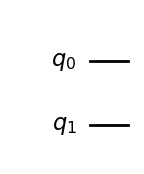

Circuit for case 2:


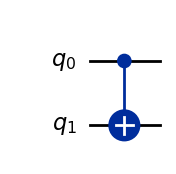

Circuit for case 3:


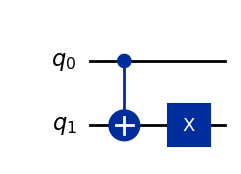

Circuit for case 4:


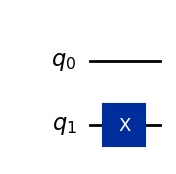

In [4]:
# Visualize each circuit for cases 1 to 4
for case in range(1, 5):
    circuit = deutsch_function(case)
    print(f"Circuit for case {case}:")
    display(circuit.draw(output='mpl'))  # Display the circuit

In [5]:
def compile_circuit(function: QuantumCircuit):
    """Compiles a circuit for use in Deutsch's algorithm."""

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

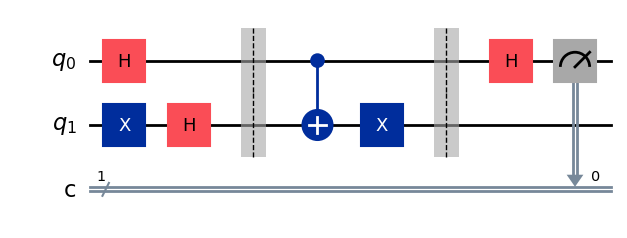

In [6]:
display(compile_circuit(deutsch_function(3)).draw(output='mpl'))

In [7]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    """Determine if a Deutsch function is constant or balanced."""

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()[0]

    if measurements == "0":
        return "constant"

    return "balanced"

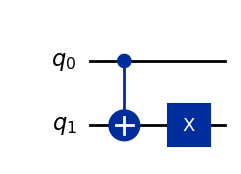

'balanced'

In [8]:
f = deutsch_function(3)
display(f.draw(output='mpl'))

display(deutsch_algorithm(f))